Imports


In [142]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [143]:
data_path = "../udataset/health_data.csv"
df = pd.read_csv(data_path)
df['state']

0      Alaska
1      Alaska
2      Alaska
3      Alaska
4      Alaska
        ...  
643    Oregon
644    Oregon
645    Oregon
646    Oregon
647    Oregon
Name: state, Length: 648, dtype: object

Do PCA on data

In [144]:
features = df.drop(columns=["state", "year"])
no_components = 2
pca = PCA(n_components=no_components)
pca_features = pca.fit_transform(features)
df = pd.concat([df[["state", "year"]], pd.DataFrame(pca_features)], axis=1)
df

,state,year,0,1
0,Alaska,2011,-0.297482,-0.246982
1,Alaska,2012,-0.406416,-0.201837
2,Alaska,2013,-0.208416,-0.159822
3,Alaska,2014,-0.084649,0.089009
4,Alaska,2015,-0.141960,-0.139573
...,...,...,...,...
643,Oregon,2018,-0.041694,0.159556
644,Oregon,2019,-0.064221,0.040993
645,Oregon,2020,-0.198318,0.019477
646,Oregon,2021,-0.034464,0.107075


Predict clusters

In [145]:
# Drop the state column
state = df['state']
features = df.drop(['state'], axis=1)

start_year = df['year'].min()
end_year = df['year'].max()
df['cluster'] = pd.NA

num_clusters = 2
init = None
for year in range(start_year, end_year + 1):
    if init is None:
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    else:
        kmeans = KMeans(n_clusters=num_clusters, init=init, random_state=0)
        
    year_features = features[features['year'] == year].drop(['year'], axis=1)
    cluster = kmeans.fit_predict(year_features)
    df.loc[df['year'] == year, 'cluster'] = cluster
    init = kmeans.cluster_centers_
    
    print(f"Silhouette score for {year}: {silhouette_score(year_features, cluster)}")
    print(f"Inertia: {kmeans.inertia_}")
    
df

Silhouette score for 2011: 0.3780838401347269
Inertia: 1.6641009776139994
Silhouette score for 2012: 0.4012049719326822
Inertia: 1.7441900240493438
Silhouette score for 2013: 0.39325797097292203
Inertia: 1.6470008400222065
Silhouette score for 2014: 0.3812923516064177
Inertia: 1.1714953555589094
Silhouette score for 2015: 0.38250490969216183
Inertia: 1.6884328095899934
Silhouette score for 2016: 0.38376952734749536
Inertia: 1.5546321714032976
Silhouette score for 2017: 0.42892637921288557
Inertia: 1.5601664785088367
Silhouette score for 2018: 0.446812349059842
Inertia: 1.6171153495690984
Silhouette score for 2019: 0.43989675399956846
Inertia: 1.6898634306197287
Silhouette score for 2020: 0.5067617279774784
Inertia: 1.4646942268385181
Silhouette score for 2021: 0.43274378961909243
Inertia: 1.9065064469599855
Silhouette score for 2022: 0.4024434979157409
Inertia: 1.695166503882297


,state,year,0,1,cluster
0,Alaska,2011,-0.297482,-0.246982,1
1,Alaska,2012,-0.406416,-0.201837,1
2,Alaska,2013,-0.208416,-0.159822,1
3,Alaska,2014,-0.084649,0.089009,1
4,Alaska,2015,-0.141960,-0.139573,1
...,...,...,...,...,...
643,Oregon,2018,-0.041694,0.159556,1
644,Oregon,2019,-0.064221,0.040993,1
645,Oregon,2020,-0.198318,0.019477,1
646,Oregon,2021,-0.034464,0.107075,1


Reformat and name colums

In [146]:
# Move the cluster column to the start
cols = df.columns.tolist()
df = df[[cols[0]] + [cols[1]] +[ cols[-1]] + cols[2:-1]]

# Rename the principal components
pca_mapping = {i: f"PC{i+1}" for i in range(no_components)}
df = df.rename(columns=pca_mapping)

df

,state,year,cluster,PC1,PC2
0,Alaska,2011,1,-0.297482,-0.246982
1,Alaska,2012,1,-0.406416,-0.201837
2,Alaska,2013,1,-0.208416,-0.159822
3,Alaska,2014,1,-0.084649,0.089009
4,Alaska,2015,1,-0.141960,-0.139573
...,...,...,...,...,...
643,Oregon,2018,1,-0.041694,0.159556
644,Oregon,2019,1,-0.064221,0.040993
645,Oregon,2020,1,-0.198318,0.019477
646,Oregon,2021,1,-0.034464,0.107075


In [147]:
print(df[(df['cluster'] == 1) & (df['year'] == 2021)]['state'])

22                  Arizona
34     District of Columbia
70             Rhode Island
82                  Montana
118                New York
166                    Utah
178                 Vermont
298                 Florida
310                   Idaho
334           New Hampshire
394              New Jersey
430                  Hawaii
454                 Wyoming
466             Connecticut
490              California
526                  Nevada
550           Massachusetts
574                Colorado
622              Washington
634               Minnesota
646                  Oregon
Name: state, dtype: object


Add visualization of groups

Text(0.5, 1.0, 'KMeans Clustering of States for Health Data (All years)')

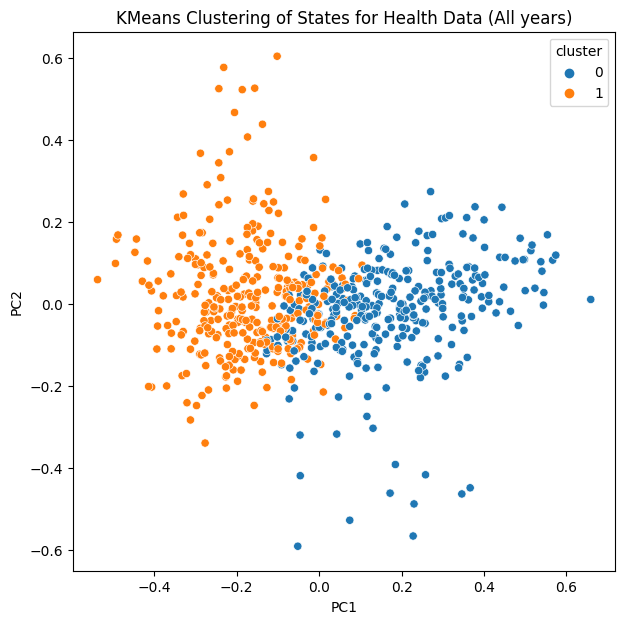

In [148]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title("KMeans Clustering of States for Health Data (All years)")

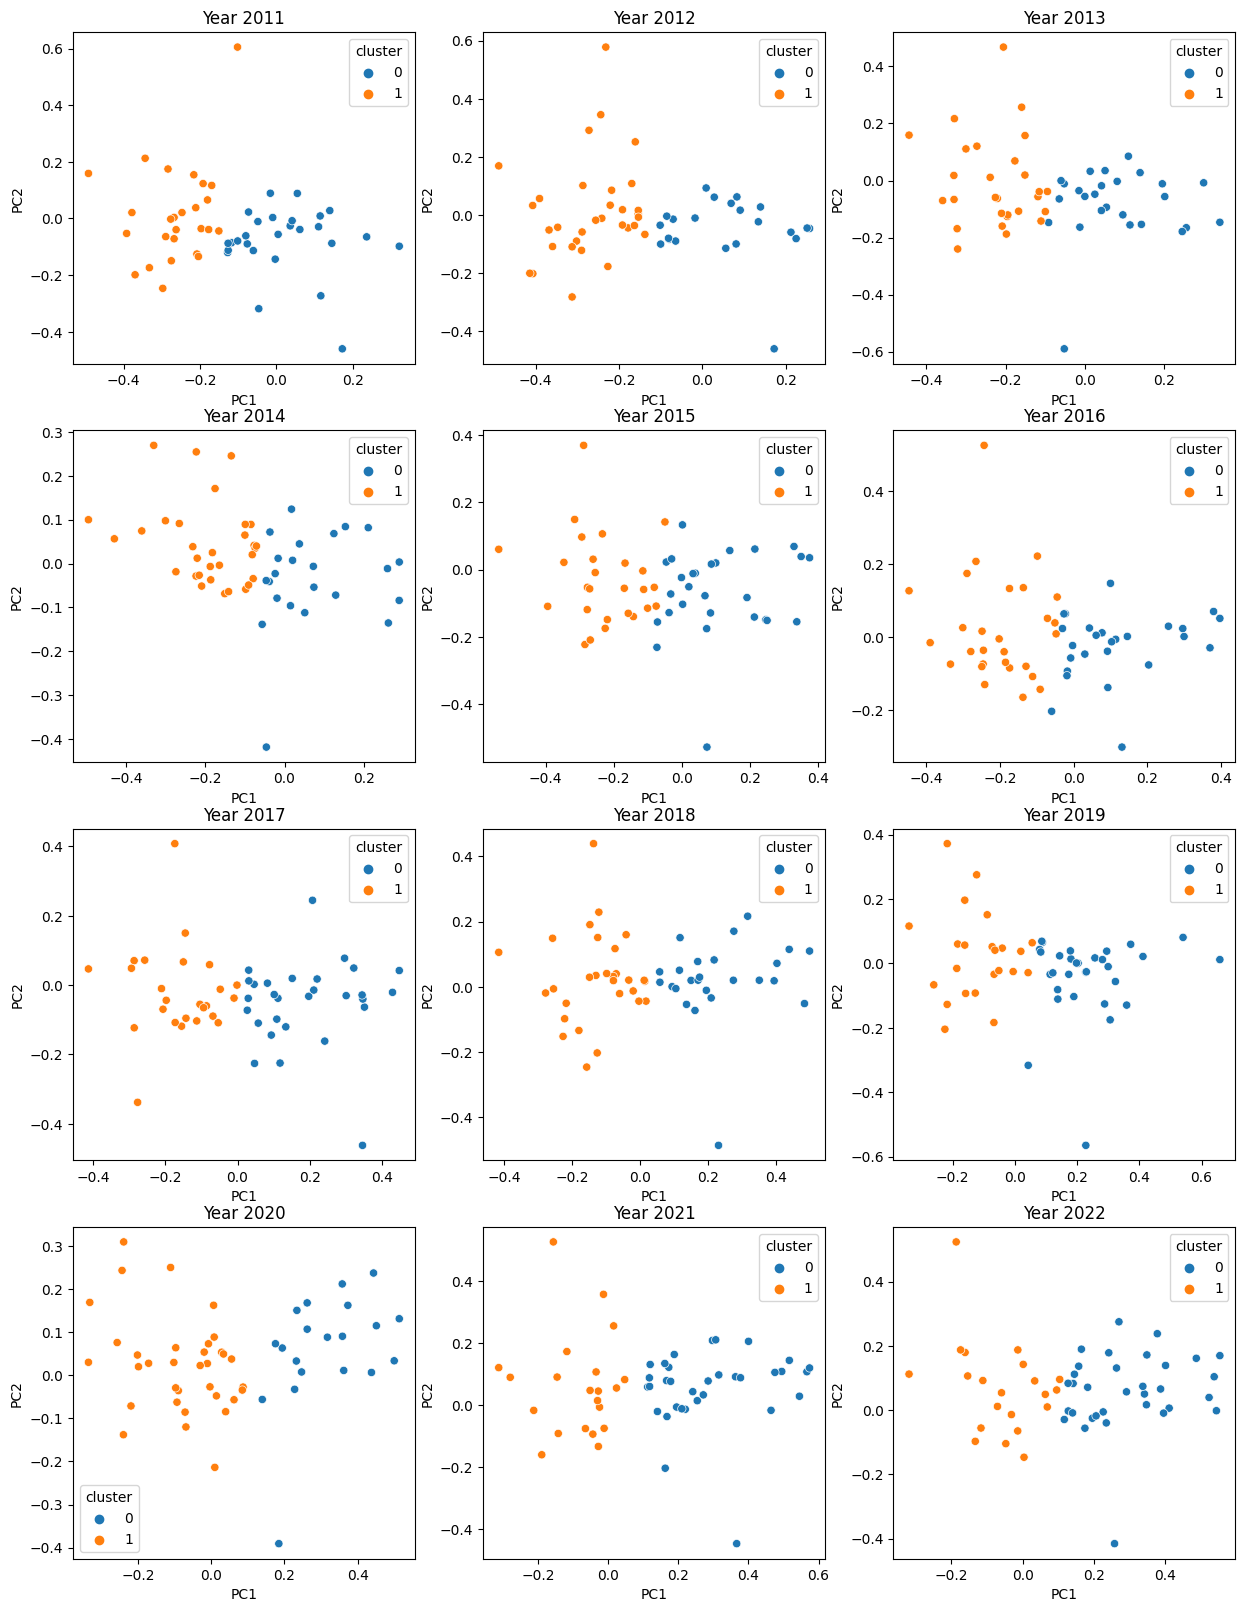

In [152]:
num_years = end_year - start_year + 1
col = 3
row = num_years // col + 1
plt.figure(figsize=(5 * col, 5 * row))

for i, year in enumerate(range(start_year, end_year + 1)):
    plt.subplot(row, col, i + 1)
    sns.scatterplot(data=df[df['year'] == year], x='PC1', y='PC2', hue='cluster', palette='tab10')
    plt.title(f"Year {year}")

In [150]:
NEWNAME = 'health_data_clustered.csv'
df.to_csv('../udataset/' + NEWNAME, index=False)